In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import math
from math import sqrt
import cv2

# Image similarity

In [12]:
from google.colab import files
files = files.upload()

image1 = Image.open(list(files.keys())[0])
image2 = Image.open(list(files.keys())[1])

# converting to 8 bit images
img1 = image1.convert('L')
img1.save("path.jpg")
img2 = image2.convert('L')

Saving Screenshot 23png.png to Screenshot 23png (3).png
Saving Screenshot 25.png to Screenshot 25.png


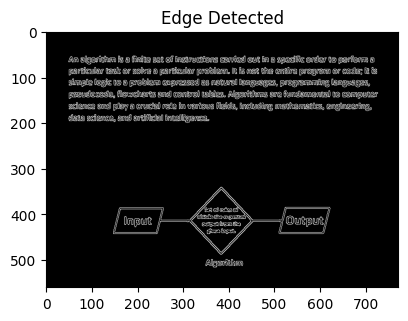

In [13]:
def separate_diagram(image_path,threshold):

    image = cv2.imread(image_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detected')

    # contour with the largest area (likely the diagram)
    max_contour = max(contours, key=cv2.contourArea)
    max_area = cv2.contourArea(max_contour)

    if max_area<threshold:
      print("No Diagram")
      return None
    # print(max_area)

    x, y, w, h = cv2.boundingRect(max_contour)
    side_length = max(w, h)

    # Ensure the square fits within the image dimensions
    side_length = min(side_length, min(image.shape[:2]))

    # Crop
    cropped_diagram = image[y:y + side_length, x:x + side_length]

    return cropped_diagram

diagram = separate_diagram("path.jpg",5000)




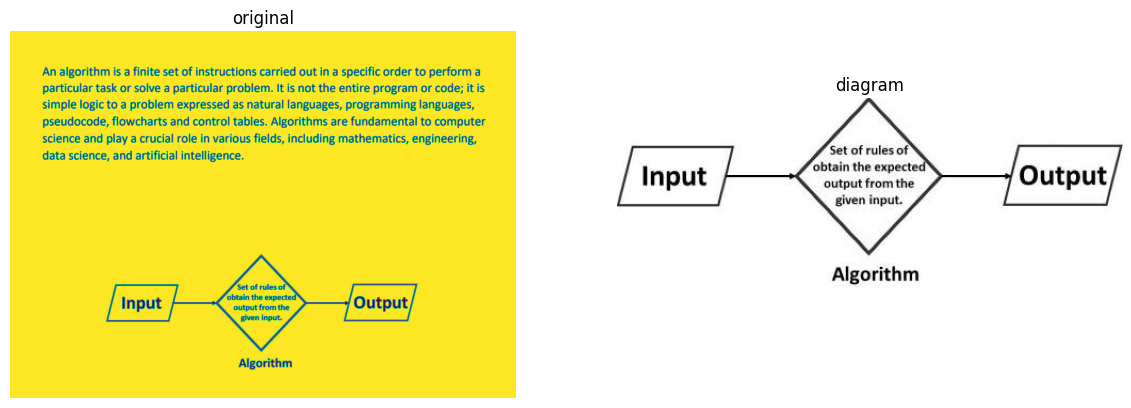

In [14]:
plt.figure(figsize=[30,12])

plt.subplot(141);plt.imshow(img1)
plt.title("original")
plt.axis('off')

if diagram is not None:
  plt.subplot(142);plt.imshow(diagram)
  plt.title("diagram")
  plt.axis('off')

plt.show()

In [15]:
# # size = (28, 28)
# # img1 = img1.resize(size)
# # img2 = img2.resize(size)
# print(img1)
# print(img2)

In [16]:
img_arr1 = np.array(diagram)
img_arr2 = np.array(img2)
print(img_arr1)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [17]:
# flattening
flat_img1=img_arr1.flatten()
flat_img2=img_arr2.flatten()


# normalizing
norm_img1 = flat_img1/255.0
norm_img2 = flat_img2/255.0
print(norm_img1)

[1. 1. 1. ... 1. 1. 1.]


In [18]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

similarity=cosineSim(norm_img1,norm_img2)*100
print("Diagram Similarity:",end=" ")
print(round(similarity, 2))

Diagram Similarity: 97.11
